In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
comments_data = pd.read_csv('0_All_comments_2_all_matched.csv')

In [4]:
comments_data.columns

Index(['gvkey', 'conm', 'searched_company_name', 'overall_rating', 'benefit',
       'category', 'category_rating', 'comment_date', 'comment_score',
       'comment_position', 'comment_content', 'employee_reporting',
       'employer_verified'],
      dtype='object')

In [5]:
comments_data[['gvkey']].groupby('gvkey').size().describe()

count     3936.000000
mean       144.431657
std        495.969348
min          1.000000
25%          7.000000
50%         31.000000
75%        109.250000
max      10613.000000
dtype: float64

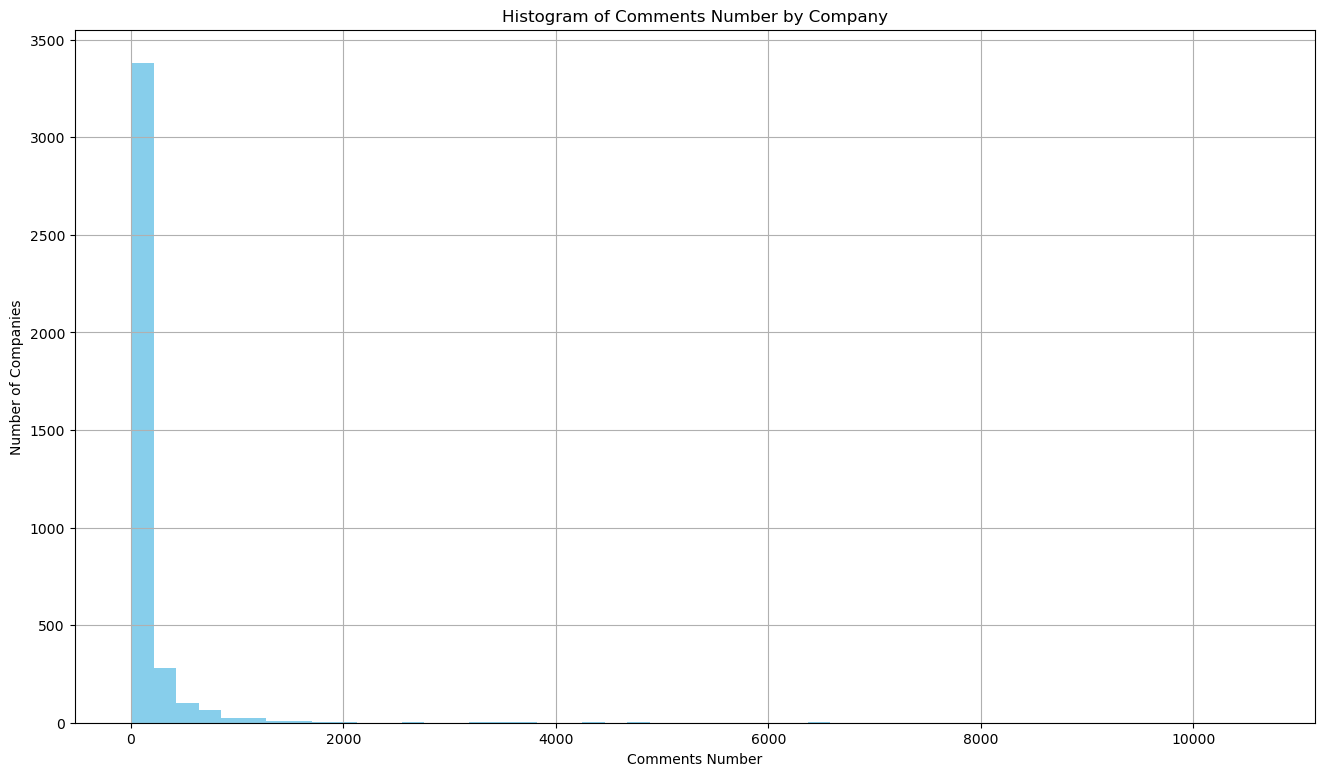

In [6]:
group_sizes = comments_data[['gvkey']].groupby('gvkey').size().values
plt.figure(figsize=(16,9)) 
plt.hist(group_sizes, bins=50, color='skyblue')
plt.grid(True)
plt.title('Histogram of Comments Number by Company')
plt.xlabel('Comments Number')
plt.ylabel('Number of Companies')
plt.show()

In [7]:
comments_data['employer_verified'].isna().sum()

192721

In [56]:
23127+37654

60781

In [8]:
len(comments_data)

568483

In [9]:
pd.DataFrame(comments_data.groupby('category')['overall_rating'].apply(lambda x: x.mode()))

,,overall_rating
category,,
401K Plan,0,4.0
Accidental Death & Dismemberment Insurance,0,4.0
Adoption Assistance,0,4.0
Apprenticeship Program,0,4.1
Bereavement Leave,0,4.0
Charitable Gift Matching,0,4.5
Childcare,0,4.2
Commuter Checks & Assistance,0,4.5
Company Car,0,4.3


In [10]:
import numpy as np
comments_data['employer_verified'] = comments_data['employer_verified'].replace(np.nan, 'Employer not verified')


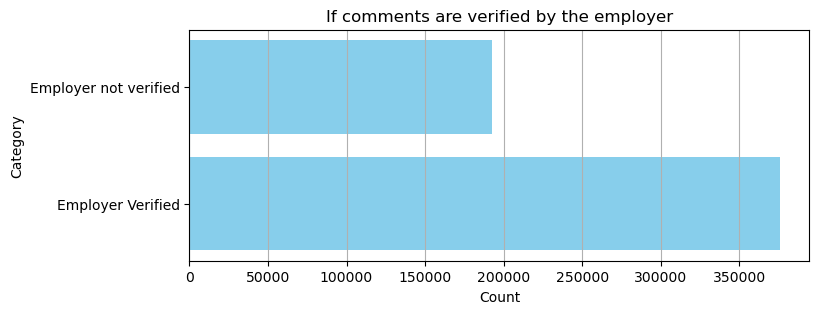

In [11]:
category_counts = comments_data.groupby('employer_verified').count()['gvkey']
plt.figure(figsize=(8,3))  # Adjust figure size if needed
plt.barh(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('If comments are verified by the employer')
plt.grid(axis='x')  # Add gridlines along the x-axis

plt.show()

In [12]:

from difflib import SequenceMatcher

def match_column(row):
    str1 = row['conm']
    str2 = row['searched_company_name']
    matcher = SequenceMatcher(None, str1, str2)
    match = matcher.find_longest_match(0, len(str1), 0, len(str2))
    similarity = match.size / max(len(str1), len(str2))  # 计算相似度
    return similarity

# Apply match_column function row-wise
comments_data['similarity'] = comments_data.apply(match_column, axis=1)


In [18]:
comments_data[['conm', 'searched_company_name', 'similarity']].drop_duplicates().sort_values(by = 'similarity').to_csv('similarity.csv')